# Gradient Boosting Decision Tree Exercise solution

The aim of this exercise is to:

* verify if a GBDT tends to overfit if the number of estimators is not
  appropriate as previously seen for AdaBoost;
* use the early-stopping strategy to avoid adding unnecessary trees, to
  get the best generalization performances.

we will use the California housing dataset to conduct our experiments.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5)

Similarly to the previous exercise, create a gradient boosting decision tree
and create a validation curve to assess the impact of the number of trees
on the generalization performance of the model. Use the mean absolute error
to assess the generalization performance of the model.

In [2]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import validation_curve

gbdt = GradientBoostingRegressor()
param_range = np.unique(np.logspace(0, 1.8, num=30).astype(int))
train_scores, test_scores = validation_curve(
    gbdt, 
    data_train,
    target_train,
    param_name="n_estimators",
    param_range=param_range,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
train_errors, test_errors = -train_scores, -test_scores

In [6]:
param_range = np.unique(np.logspace(0, 1.8, num=30).astype(int))
param_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 15, 17, 20, 23, 26, 30,
       35, 41, 47, 54, 63])

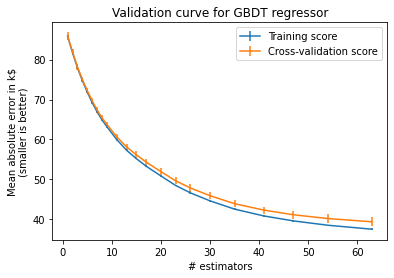

In [3]:
import matplotlib.pyplot as plt

plt.errorbar(
    param_range,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training score",
)
plt.errorbar(
    param_range,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Cross-validation score",
)

plt.legend()
plt.ylabel("Mean absolute error in k$\n(smaller is better)")
plt.xlabel("# estimators")
_ = plt.title("Validation curve for GBDT regressor")

Unlike AdaBoost, the gradient boosting model will always improve when
increasing the number of trees in the ensemble. However, it will reach a
plateau where adding new trees will just make fitting and scoring slower.

To avoid adding new unnecessary tree, gradient boosting offers an
early-stopping option. Internally, the algorithm will use an out-of-sample
set to compute the generalization performance of the model at each addition of a
tree. Thus, if the generalization performance is not improving for several
iterations, it will stop adding trees.

Now, create a gradient-boosting model with `n_estimators=1000`. This number
of trees will be too large. Change the parameter `n_iter_no_change` such
that the gradient boosting fitting will stop after adding 5 trees that do not
improve the overall generalization performance.

In [4]:
gbdt = GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=5)
gbdt.fit(data_train, target_train)
gbdt.n_estimators_

261

We see that the number of trees used is far below 1000 with the current
dataset. Training the GBDT with the entire 1000 trees would have been
useless.